In [1]:
import pandas as pd
import os
import numpy as np
from pyproj import Transformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import gc
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from haversine import haversine, Unit

In [4]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't break lines
pd.set_option('display.max_colwidth', None) # Show full content in each cell

# Define file path
save_dir = r'C:\Users\sagni\Documents\Personal Files\Research\doi_10_5061_dryad_k0p2ngfhn__v20250410'
file_path = os.path.join(save_dir, 'Clustered_Data.xlsx')

# Read Excel
merged_df = pd.read_excel(file_path)

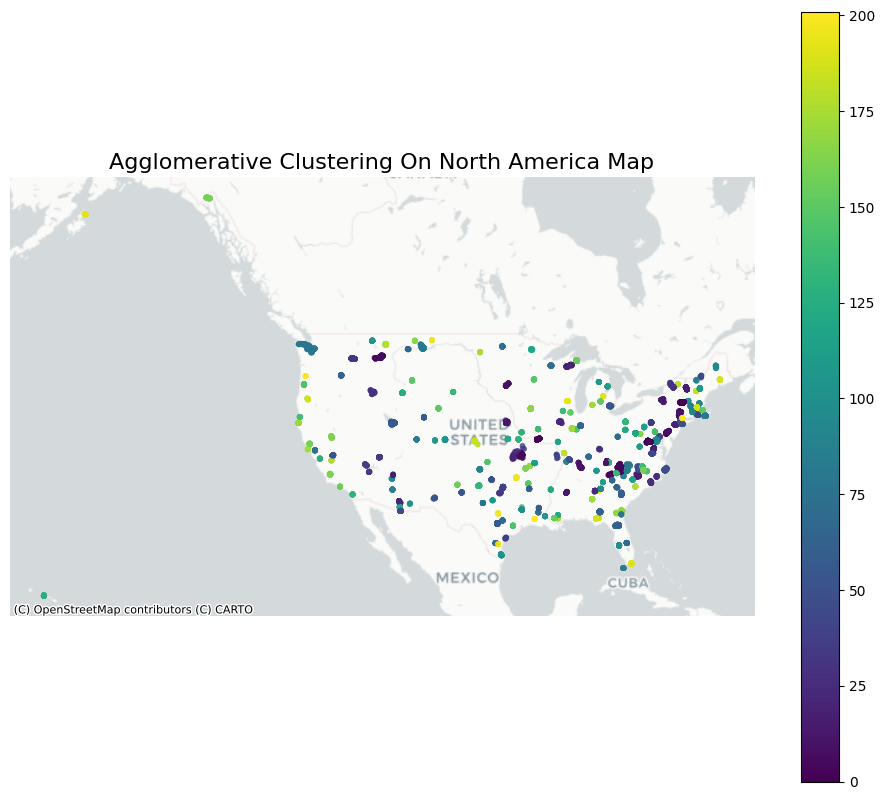

In [5]:
# Create a GeoDataFrame from your dataframe with lat/lon points
geometry = [Point(xy) for xy in zip(merged_df['Longitude'], merged_df['Latitude'])]
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator for plotting with contextily basemap
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot colored by cluster label
gdf.plot(column='Cluster_Agglo', cmap='viridis', legend=True, markersize=10, alpha=0.7, ax=ax)

# Add basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Set title and axes off
ax.set_title('Agglomerative Clustering On North America Map', fontsize=16)
ax.set_axis_off()

plt.show()


C:\Users\sagni\AppData\Local\Temp\ipykernel_20756\202775141.py:9: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroids = gdf.groupby('Cluster_Agglo')['geometry'].apply(lambda x: x.unary_union.centroid)


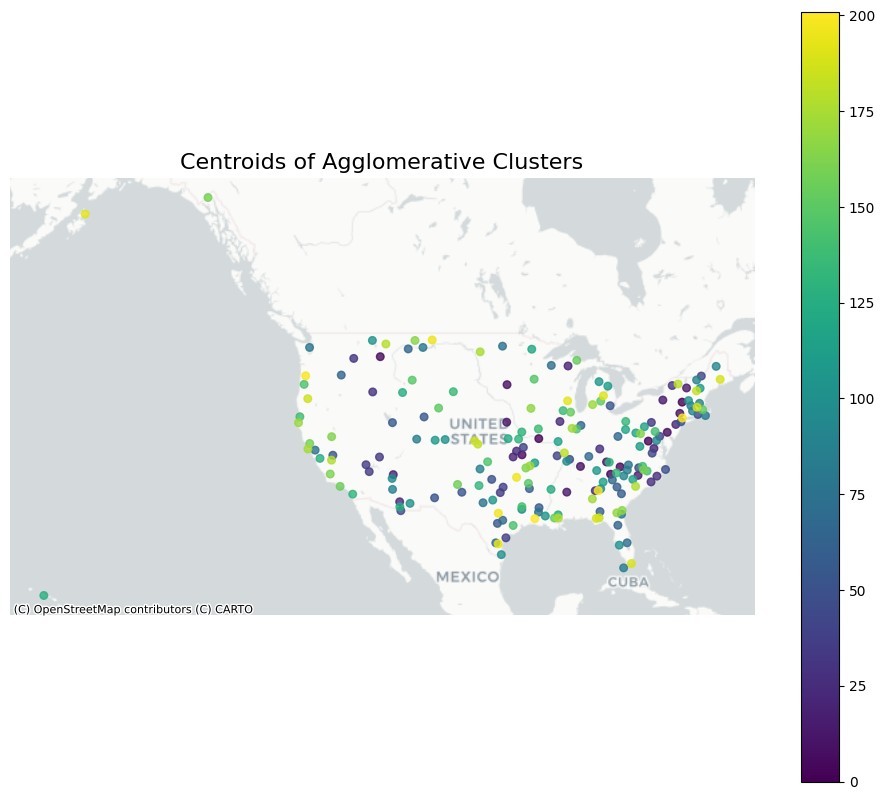

In [6]:
# Create a GeoDataFrame from your DataFrame with lat/lon points
geometry = [Point(xy) for xy in zip(merged_df['Longitude'], merged_df['Latitude'])]
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator (for contextily basemap)
gdf = gdf.to_crs(epsg=3857)

# Compute cluster centroids
centroids = gdf.groupby('Cluster_Agglo')['geometry'].apply(lambda x: x.unary_union.centroid)
centroids_gdf = gpd.GeoDataFrame(centroids, geometry='geometry', crs=gdf.crs).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot centroids colored by cluster
centroids_gdf.plot(column='Cluster_Agglo', cmap='viridis', legend=True, markersize=30, alpha=0.8, ax=ax)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Style
ax.set_title('Centroids of Agglomerative Clusters', fontsize=16)
ax.set_axis_off()

plt.show()

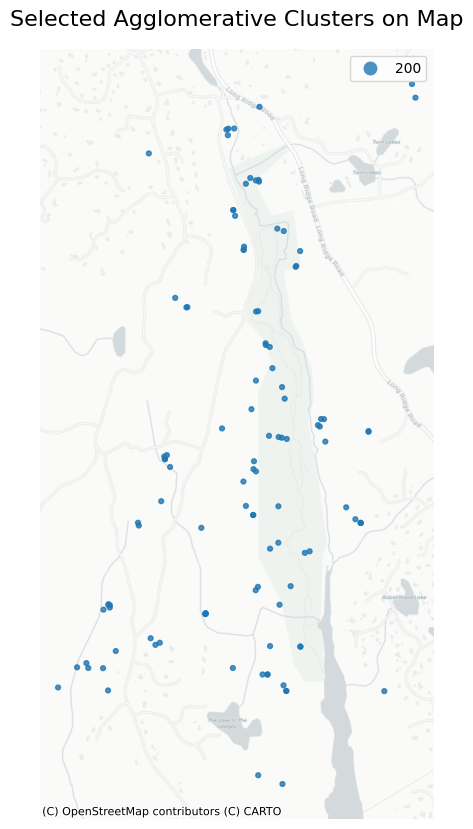

In [12]:
# List of clusters to visualize
selected_clusters = [200]

# Filter the dataframe
subset_gdf = gdf[gdf['Cluster_Agglo'].isin(selected_clusters)]

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot only the selected clusters
subset_gdf.plot(column='Cluster_Agglo', categorical=True, cmap='tab10', legend=True, markersize=12, alpha=0.8, ax=ax)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Set title and turn off axis
ax.set_title('Selected Agglomerative Clusters on Map', fontsize=16)
ax.set_axis_off()

plt.show()